# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
from citipy import citipy

# Import API key
import sys
sys.path.append('../../../..')
from api_keys import api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [33]:
# start api call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# params 
city_data = []
cloudiness_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lon_data = []
max_temp_data = []
wind_speed_data = []

print("Beginning Data Retrieval")
counter = 0

# perform multiple api calls and exception handle
for city in cities:   
    try:
        counter += 1
        if counter % 55 == 0:
            time.sleep(60)

        print("----------------------")
        print("Processing Record " + str(counter) + " | " + city)
        city = city.replace(" ","%20")
        response = requests.get(query_url + city).json()
        
        #api calls
        cloudiness_data.append(response.get("clouds").get("all"))
        country_data.append(response.get("sys").get("country"))
        date_data.append(response.get("dt"))
        humidity_data.append(response.get("main").get("humidity"))
        lat_data.append(response.get("coord").get("lat"))
        lon_data.append(response.get("coord").get("lon"))
        max_temp_data.append(response.get("main").get("temp_max"))
        wind_speed_data.append(response.get("wind").get("speed"))
        city_data.append(response.get("name")) # city is last for better error handling

    except:
        print("City not found. Skipping...")

print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
----------------------
Processing Record 1 | ushuaia
----------------------
Processing Record 2 | alofi
----------------------
Processing Record 3 | hermanus
----------------------
Processing Record 4 | atuona
----------------------
Processing Record 5 | faanui
----------------------
Processing Record 6 | lata
----------------------
Processing Record 7 | cape town
----------------------
Processing Record 8 | moscow
----------------------
Processing Record 9 | linqiong
----------------------
Processing Record 10 | chokurdakh
----------------------
Processing Record 11 | albany
----------------------
Processing Record 12 | busselton
----------------------
Processing Record 13 | mao
----------------------
Processing Record 14 | lebu
----------------------
Processing Record 15 | limulunga
----------------------
Processing Record 16 | miri
----------------------
Processing Record 17 | leningradskiy
----------------------
Processing Record 18 | rikitea
--------------

----------------------
Processing Record 144 | eureka
----------------------
Processing Record 145 | hasaki
----------------------
Processing Record 146 | bambanglipuro
----------------------
Processing Record 147 | muros
----------------------
Processing Record 148 | sabang
----------------------
Processing Record 149 | illoqqortoormiut
City not found. Skipping...
----------------------
Processing Record 150 | zhigansk
----------------------
Processing Record 151 | biak
----------------------
Processing Record 152 | nuzvid
----------------------
Processing Record 153 | airai
----------------------
Processing Record 154 | solnechnyy
----------------------
Processing Record 155 | kalmunai
----------------------
Processing Record 156 | glace bay
----------------------
Processing Record 157 | pemba
----------------------
Processing Record 158 | kahului
----------------------
Processing Record 159 | tiksi
----------------------
Processing Record 160 | half moon bay
----------------------
P

----------------------
Processing Record 281 | chau doc
----------------------
Processing Record 282 | poum
----------------------
Processing Record 283 | atambua
----------------------
Processing Record 284 | copiapo
----------------------
Processing Record 285 | qianguo
----------------------
Processing Record 286 | tasiilaq
----------------------
Processing Record 287 | whitehorse
----------------------
Processing Record 288 | havre-saint-pierre
----------------------
Processing Record 289 | turukhansk
----------------------
Processing Record 290 | cap malheureux
----------------------
Processing Record 291 | camana
City not found. Skipping...
----------------------
Processing Record 292 | port lincoln
----------------------
Processing Record 293 | lapa
----------------------
Processing Record 294 | tunxi
City not found. Skipping...
----------------------
Processing Record 295 | cordoba
----------------------
Processing Record 296 | sungaipenuh
----------------------
Processing Reco

----------------------
Processing Record 417 | mount darwin
----------------------
Processing Record 418 | mar del plata
----------------------
Processing Record 419 | rabat
----------------------
Processing Record 420 | grand-santi
----------------------
Processing Record 421 | margate
----------------------
Processing Record 422 | samarai
----------------------
Processing Record 423 | balkhash
----------------------
Processing Record 424 | mahibadhoo
----------------------
Processing Record 425 | yabrud
----------------------
Processing Record 426 | coruripe
----------------------
Processing Record 427 | ucluelet
----------------------
Processing Record 428 | takapau
----------------------
Processing Record 429 | kihei
----------------------
Processing Record 430 | sentyabrskiy
City not found. Skipping...
----------------------
Processing Record 431 | abu kamal
----------------------
Processing Record 432 | jiuquan
----------------------
Processing Record 433 | ponta delgada
--------

----------------------
Processing Record 557 | banda aceh
----------------------
Processing Record 558 | voitsberg
----------------------
Processing Record 559 | huambo
----------------------
Processing Record 560 | storsteinnes
----------------------
Processing Record 561 | atar
----------------------
Processing Record 562 | xinmin
----------------------
Processing Record 563 | comodoro rivadavia
----------------------
Processing Record 564 | cardoso
----------------------
Processing Record 565 | baiima
----------------------
Processing Record 566 | luba
----------------------
Processing Record 567 | malwan
City not found. Skipping...
----------------------
Processing Record 568 | sao filipe
----------------------
Processing Record 569 | san andres
----------------------
Processing Record 570 | yuksekova
----------------------
Processing Record 571 | vung tau
----------------------
Processing Record 572 | limot
----------------------
Processing Record 573 | taltal
--------------------

### Convert Raw Data to DataFrame

In [35]:
len(city_data)

534

In [36]:
# this is the method if I'm not importing data from CSV, but using the lists to compile json data instead
weather_data = {"City" : city_data,
                "Cloudiness": cloudiness_data,
                "Country": country_data,
                "Date": date_data,
                "Humidity": humidity_data,
                "Lat": lat_data,
                "Lng": lon_data,
                "Max Temp": max_temp_data,
                "Wind Speed": wind_speed_data,
                }

weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1548525600,41,-54.81,-68.31,57.20,16.11
1,Alofi,12,NU,1548525600,88,-19.06,-169.92,77.00,4.70
2,Hermanus,0,ZA,1548527589,41,-34.42,19.24,78.36,9.62
3,Atuona,48,PF,1548527589,100,-9.80,-139.03,76.11,13.98
4,Faanui,64,PF,1548527589,100,-16.48,-151.75,78.45,12.97


In [42]:
# write weather data to a csv
weather_data.to_csv("../Output/weather_data.csv")


In [ ]:
# find weather values for your random list of cities
# random_df = np.random(weather_data)
# random_data.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

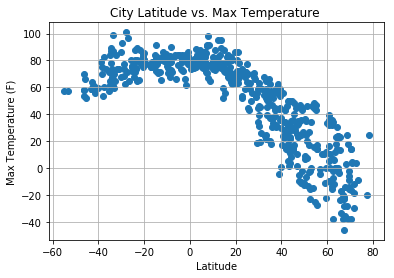

In [46]:
#format date for plot titles
# date_stamp = str(weather_data.iloc[0,3])
# date_stamp = datetime.datetime.fromtimestamp(int(date_stamp)).strftime('%m-%d-%Y')

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ") #+ date_stamp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("../Output/CityLat_vs_Max_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

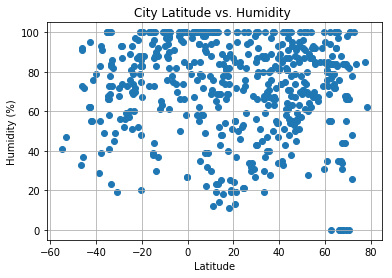

In [52]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity ")# + date_stamp)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("../Output/CityLat_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

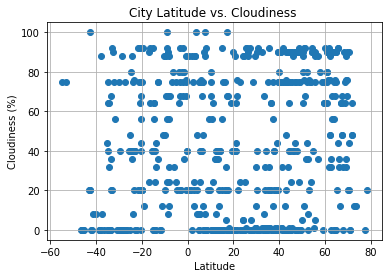

In [51]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness ") # + date_stamp)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("../Output/CityLat_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

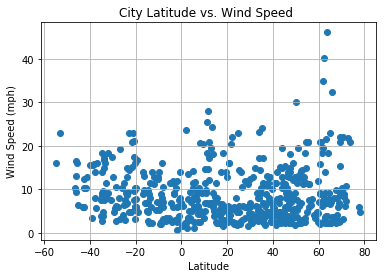

In [50]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Speed ") #+ date_stamp)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("../Output/CityLat_vs_Wind_Speed.png")

plt.show()